In [154]:
import numpy as np
from numpy import *
from matplotlib import pyplot as plt

In [155]:
X = []  
y = []   

In [156]:
def loadDataSet():
    f=open('Question5.txt')
    # Read data line by line and use strip to remove the Spaces 
    for line in f.readlines():
        nline=line.strip().split()
        # X has two columns
        X.append([float(nline[0]),float(nline[1])])
        y.append(int(nline[2]))
    return mat(X).T,mat(y)

In [157]:
X,y=loadDataSet()

In [158]:
def sigmoid(x):
    #==========
    #todo ''' complete the sigmoid function''''
    #==========
    sig = 1.0/(1.0 + np.exp(-x))
    return sig
    

In [159]:
def Logistic(X,y,W,b,n,alpha,iterations):
    
    '''
    X: input data
    y: labels
    W: weight
    b: bias
    n: number of samples
    alpha: learning rate
    iterations: the number of iteration
    '''

    J = zeros((iterations,1))
    for i in range(iterations):   
        
        # step1 forward propagation
        #==========
        #todo '''complete forward propagation equation'''
        #==========
        val = np.dot(W.T,X)+b
        y_hat = sigmoid(val)
        #print(y_hat)
        
        # compute cost function
        #==========
        #todo '''complete compute cost function equation'''
        #==========
        #cost = -(np.dot(y,np.log(y_hat).T+ np.dot((1-y), np.log(1-y_hat).T)))*(1/n)
        cost = - (1/n) * np.sum(y*np.log(y_hat).T + (1-y)*np.log(1-y_hat).T) 
        J[i] = cost
        
        # step2 backpropagation
        #==========
        #todo '''complete backpropagation equations'''
        #==========
        dW= (1/n) * np.dot(X,(y_hat - y).T)
        db = (1/n) * np.sum(y_hat-y)
        
        # step3 gradient descent
        #==========
        #todo '''complete gradientdescent equations'''
        #==========
        W = W - alpha*dW
        b= b - alpha*db
        
    return y_hat,W,b,J

In [160]:
def plotBestFit(X,y,J,W,b,n,y_hat, i, j):
    
    '''
    X: input data
    y: labels
    J: cost values
    W: weight
    b: bias
    n: number of samples
    y_hat: the predict labels from Logistic Regression 
    '''
    
    # Plot cost function figure
    #==========
    #todo '''complete the code to plot cost function results'''
    #==========
    plt.xlabel("Iteration")
    plt.ylabel("Cost")
    plt.title(f"Cost function (alpha ={i} ,iteration={j} )")
    plt.plot(range(len(J)), J)
    
    # Plot the final classification figure
    #==========
    #todo '''complete the code to Logistic Regression Classification Result'''
    #==========
    #plt.plot(
    Feature=np.array(X)
    label = np.array(y)
    class0 = np.where(label==0)[1]
    class1 = np.where(label==1)[1]
    
    plt.figure(figsize=(8, 6))
    plt.scatter(Feature[0, class0], Feature[1, class0], color='blue', label='Class 0')
    plt.scatter(Feature[0, class1], Feature[1, class1], color='red', label='Class 1')
    w = W.flatten()
    w = np.ravel(w)  
    b = np.asscalar(np.ravel(b)) if isinstance(b, np.ndarray) else b

    x1_values = np.linspace(-5, 5, 100)
    
    slope = -w[0] / w[1]
    intercept = -b / w[1]
    x2_values = slope * x1_values + intercept
    x2_values = np.ravel(x2_values)
    
    plt.plot(x1_values, x2_values, color='green', linewidth=2, label='Decision Boundary')

    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title(f"Scatter Plot of Data & Decision Boundary (alpha ={i} ,iteration={j})")
    plt.legend()
    plt.grid(True)
    plt.show()
    
    #plt.show()

In [161]:
num = X.shape[0]  # number of features
n = X.shape[1] # number of samples

In [162]:
# Initianlize the weights and bias
#==========
#todo '''complete the code to initianlize the weights and bias'''
#==========
#W = np.zeros((X.shape[0],1))
W_init = np.random.randn(2,1)*.01
b_init = np.random.rand()*0.01
W = W_init
b = b_init

In [163]:
# Learning rate
#==========
#todo '''try different learning rates''
#==========
alpha= [0.01, 0.05, 0.1, 0.11]

In [164]:
# Iterations
#==========
#todo '''try different Iterations''
#==========
iterations = [500, 1000, 2000, 5000 ]

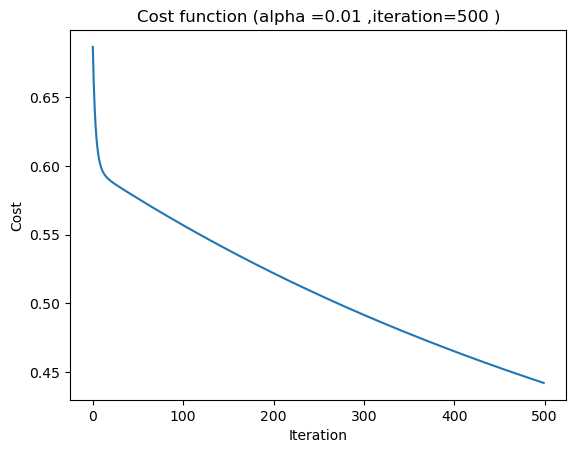

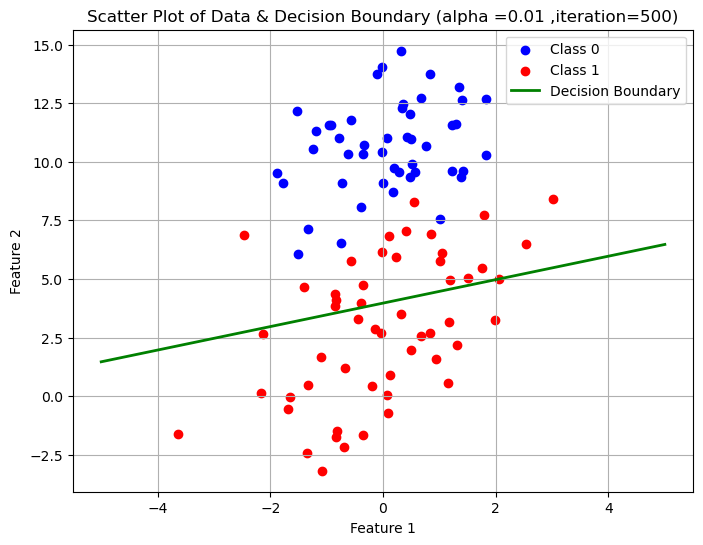

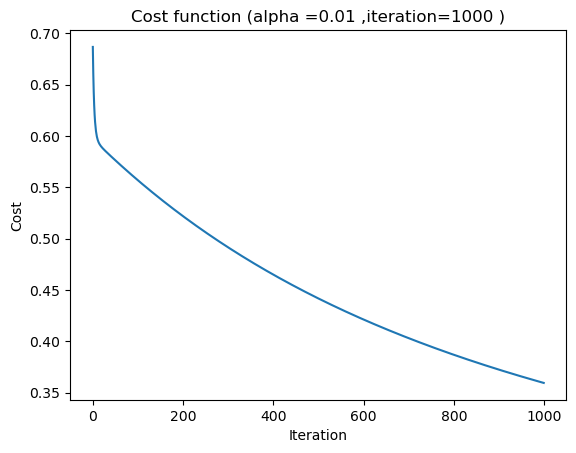

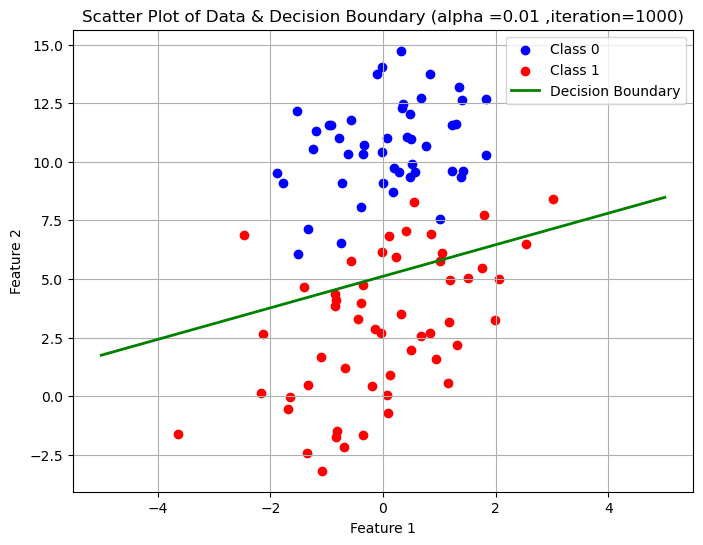

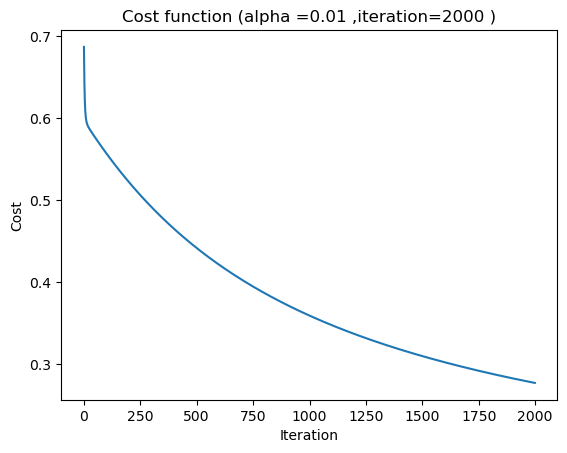

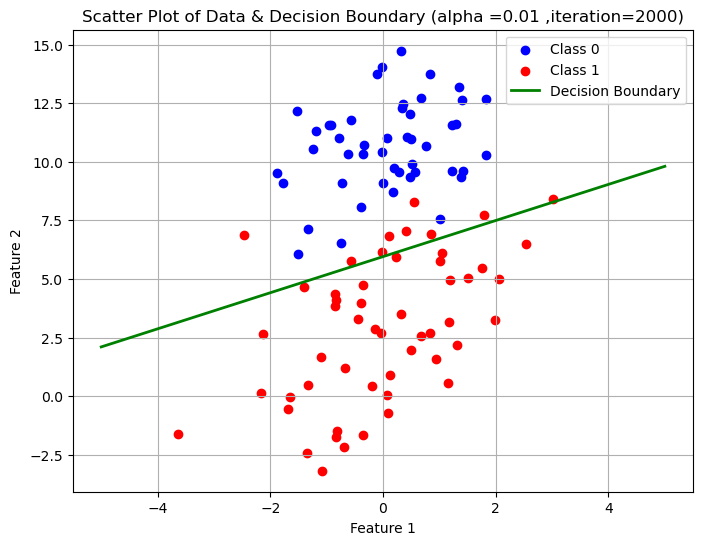

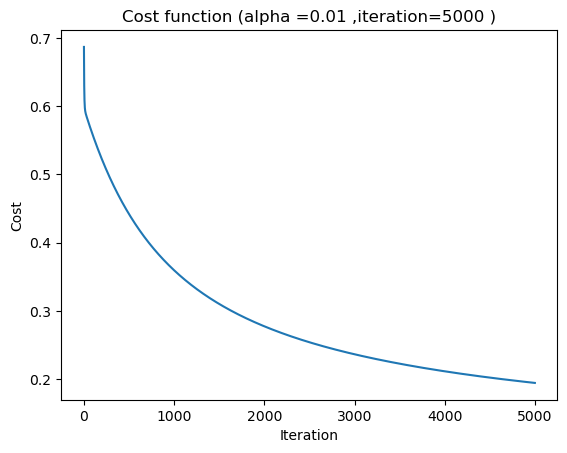

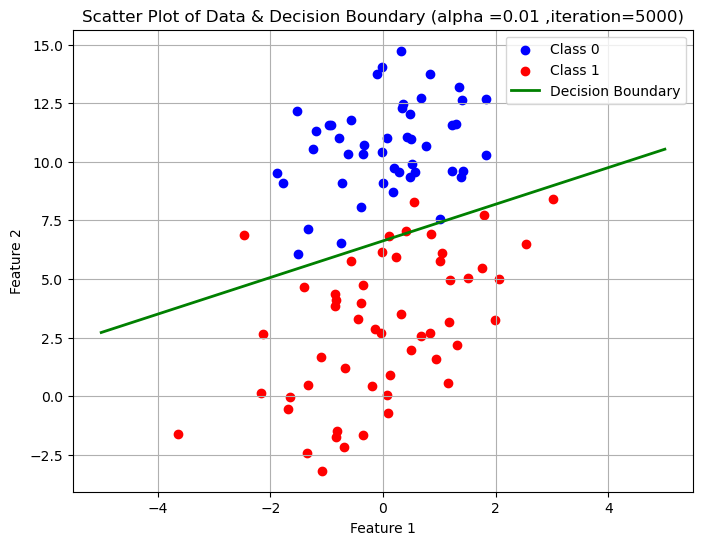

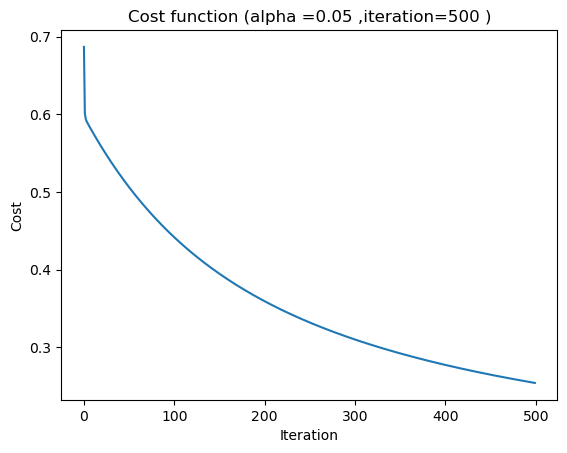

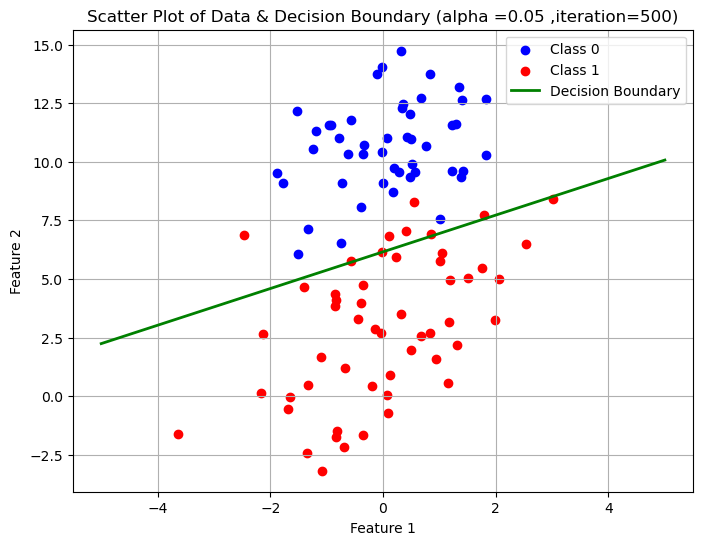

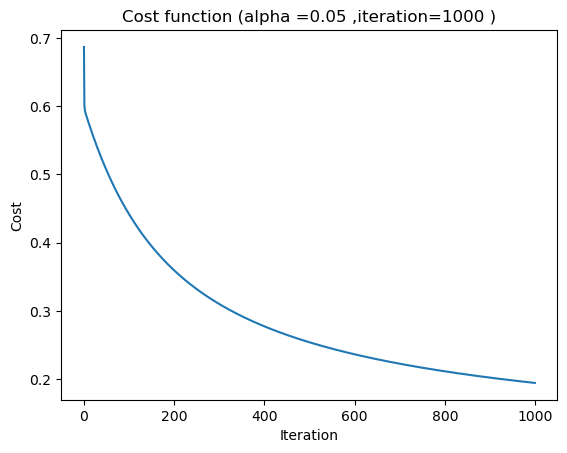

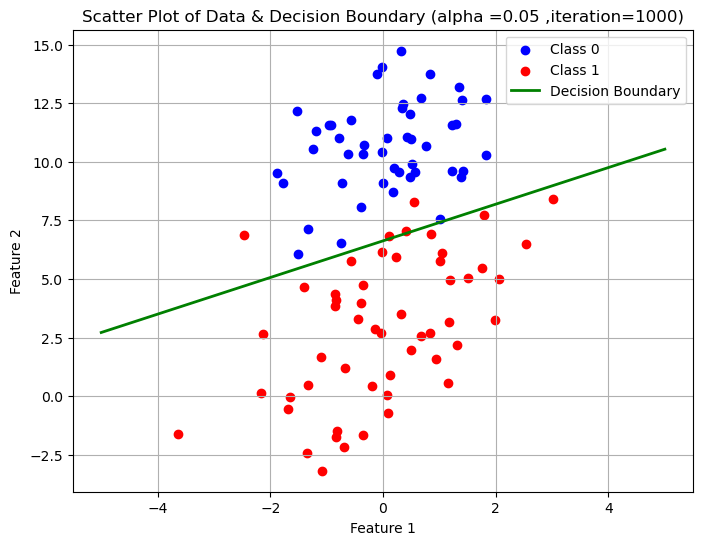

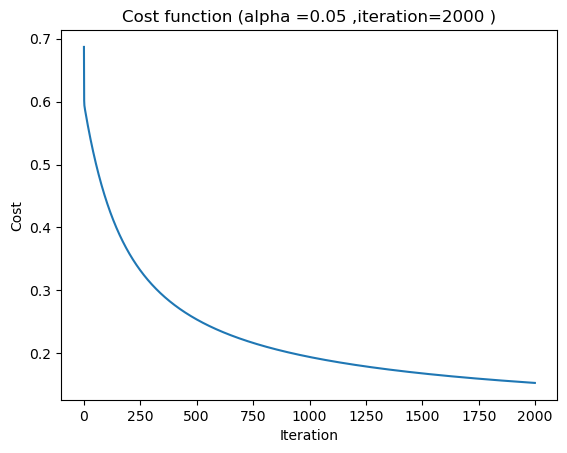

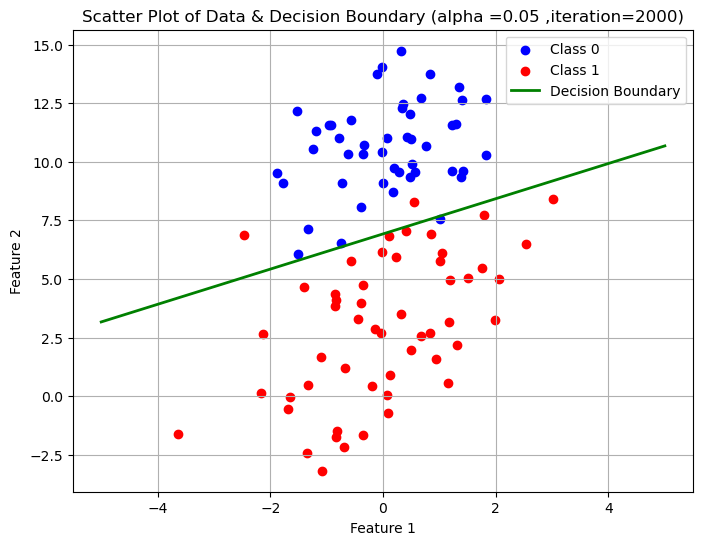

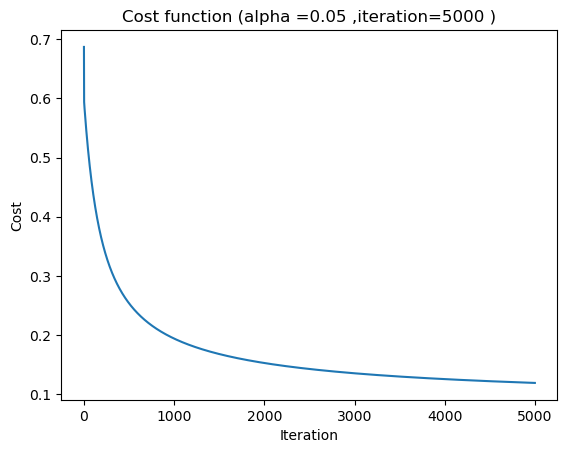

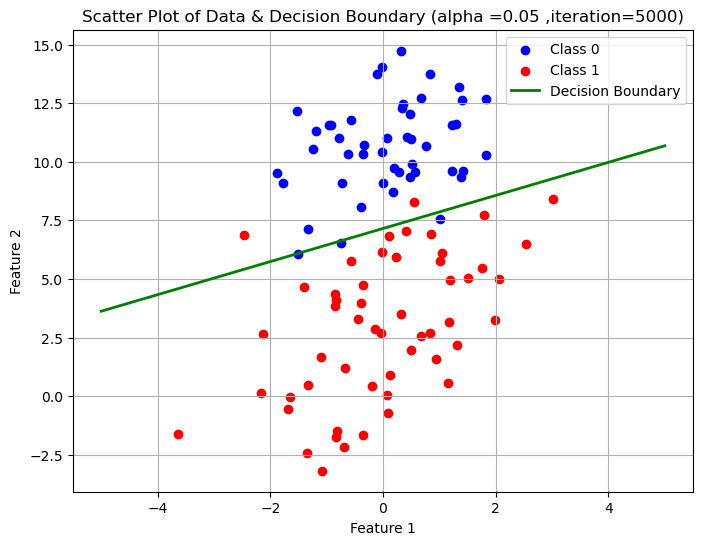

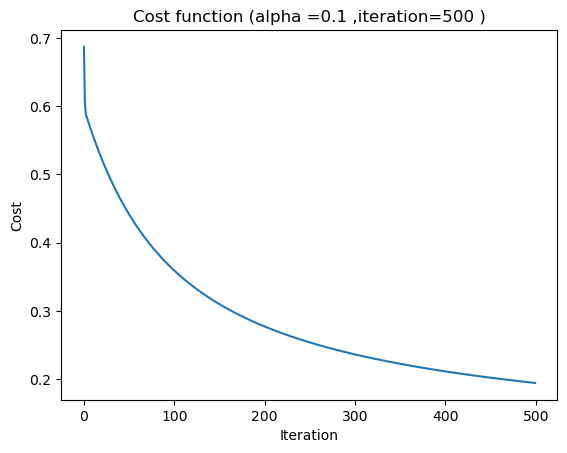

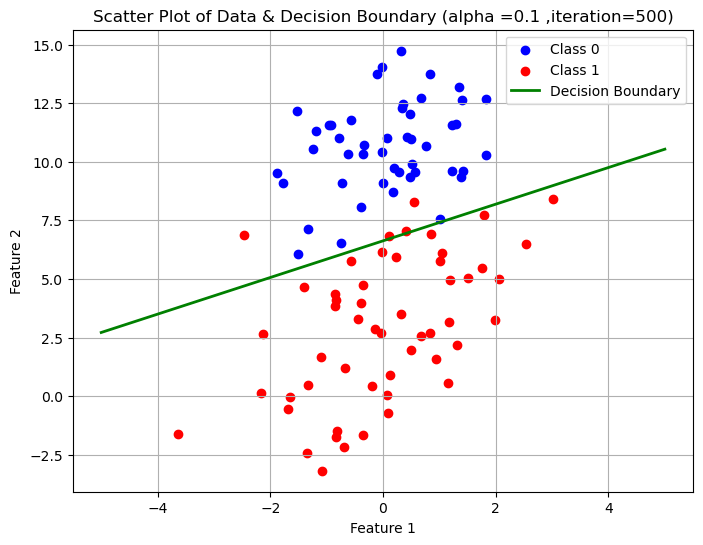

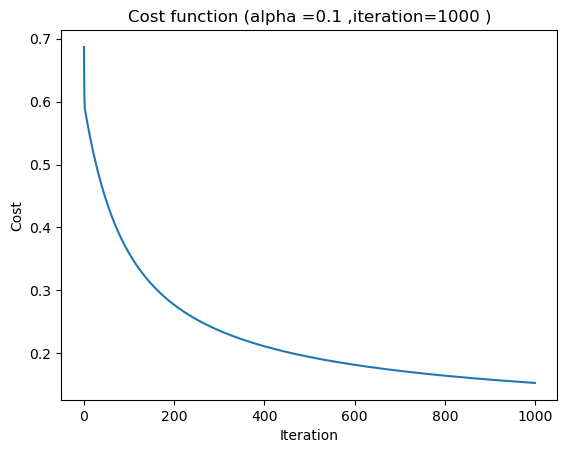

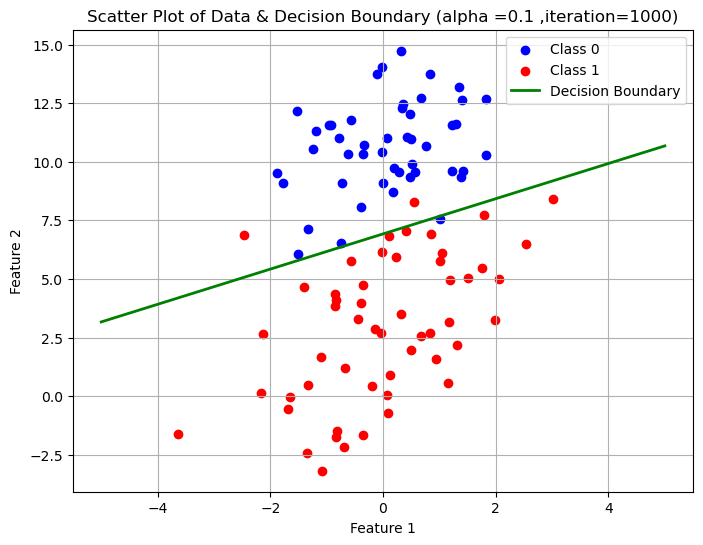

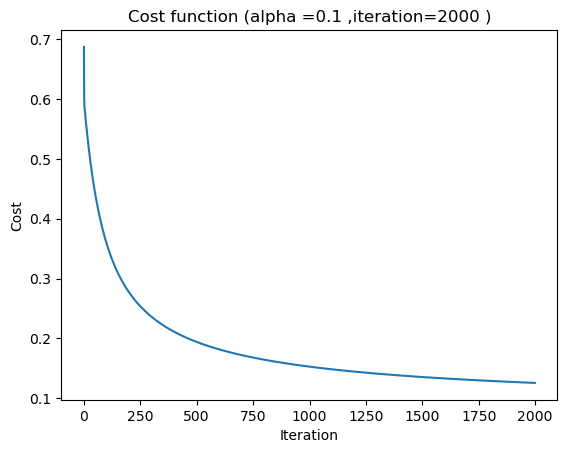

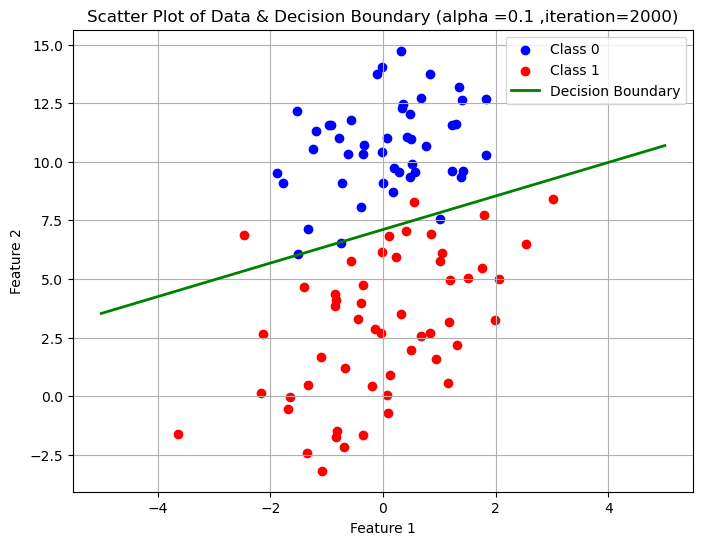

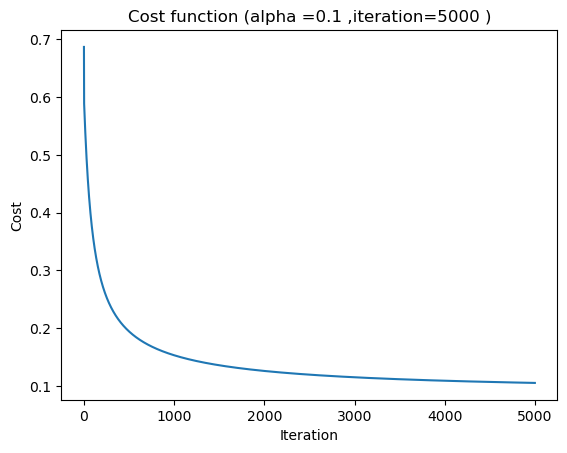

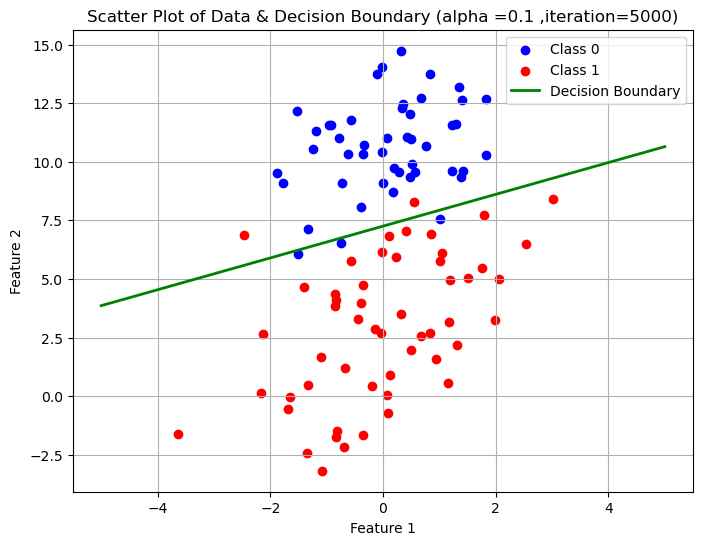

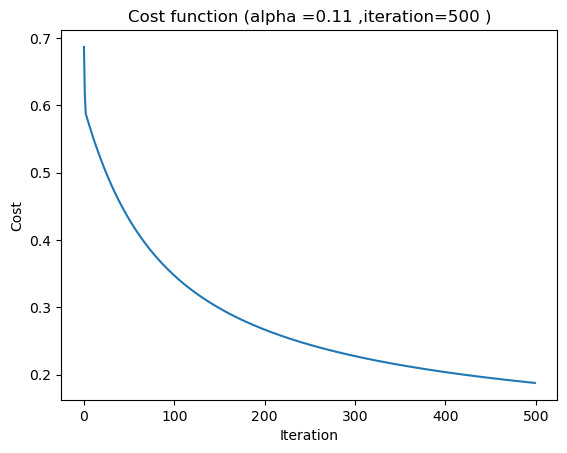

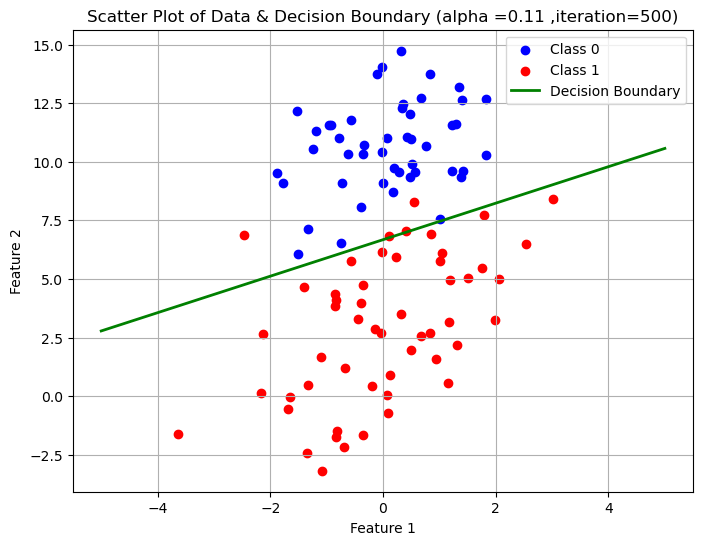

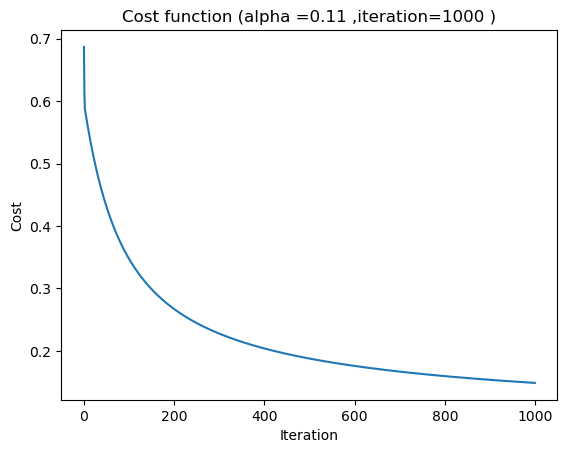

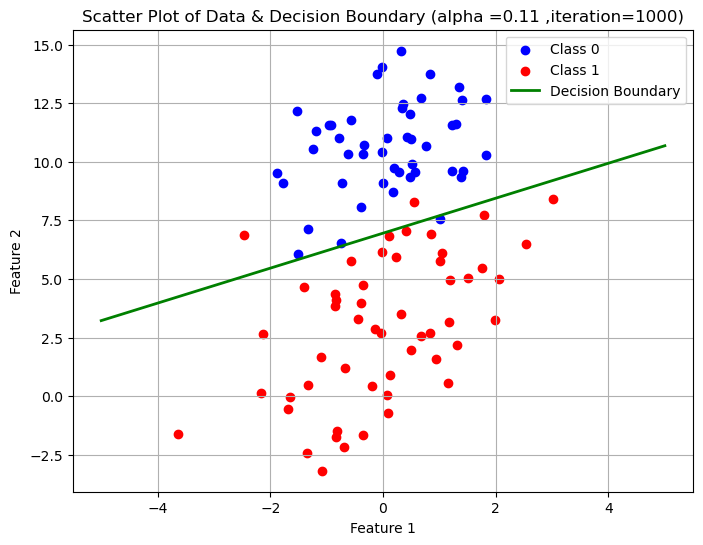

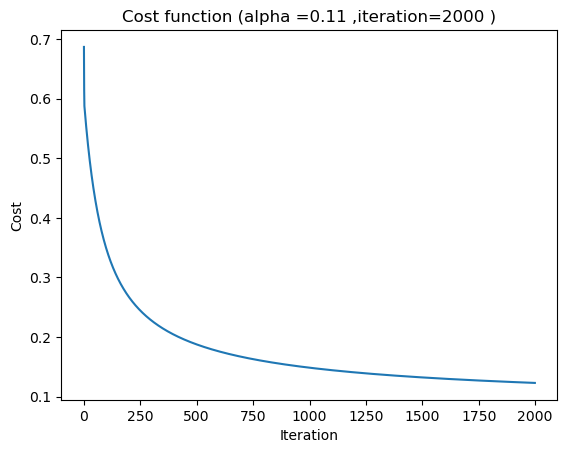

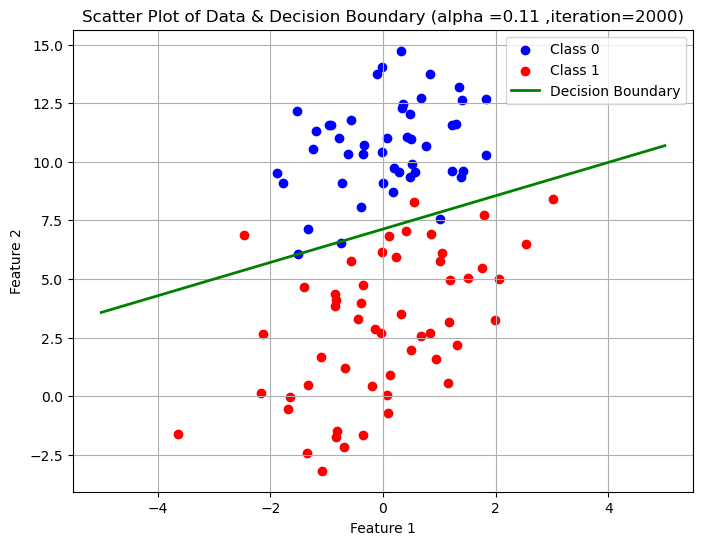

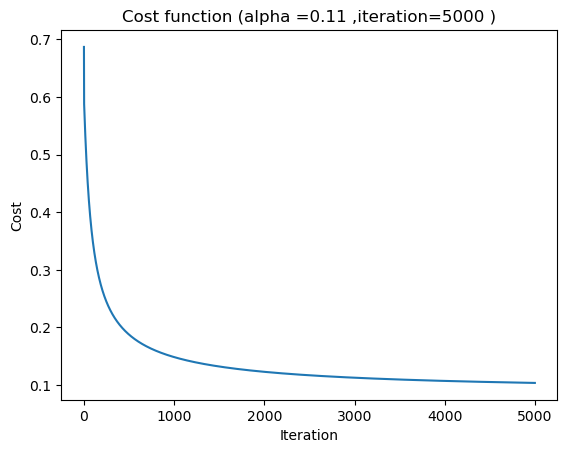

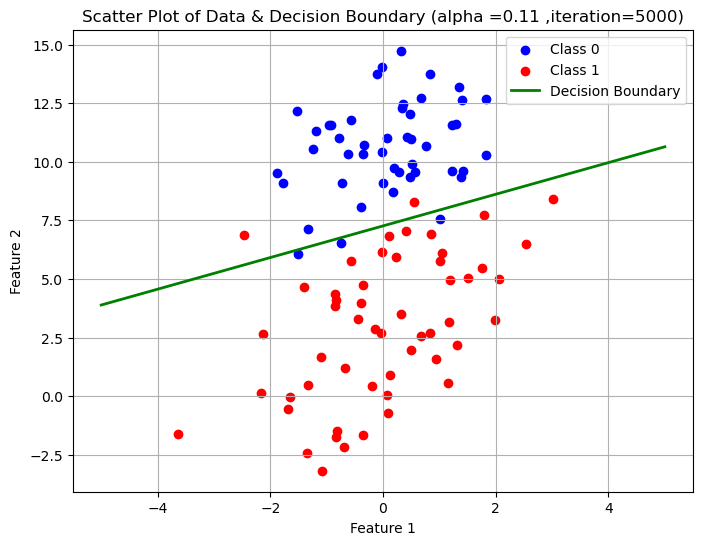

In [165]:
# Get the results from Logistic function
for i in range(len(alpha)) :
    for j in range(len(iterations)):
        W = W_init
        b = b_init
        y_hat,W,b,J = Logistic(X, y, W, b, n, alpha[i], iterations[j])
        plotBestFit(X, y, J, W, b, n, y_hat, alpha[i], iterations[j])
        

In [166]:
#plot figures